# Visualizing Earnings Based On College Majors

In this project, I'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012.

The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. The dataset was cleaned by FiveThirtyEight an released on Github.

Each row represents a different major in college and contains infomation on gender diversity, employment rates, median salaries, etc

Some of the columns in the dataset include:

- Rank: Rank by median earnings (the dataset is ordered by this column).
- Major_code: Major code.
- Major: Major description.
- Major_category: Category of major.
- Total: Total number of people with major.
- Sample_size: Sample size (unweighted) of full-time.
- Men: Male graduates.
- Women: Female graduates.
- ShareWomen: Women as share of total.
- Employed: Number employed.
- Median: Median salary of full-time, year-round workers.
- Low_wage_jobs: Number in low-wage service jobs.
- Full_time: Number employed 35 hours or more.
- Part_time: Number employed less than 35 hours.

### Visualizations will help in explorations such as:

- Using scatter plots to determine whether students in more popular majors make more money
- Using histograms to find how many majors are predominantly male and female
- Using bar plots to determine the category of majors with most students


### Setting up environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading dataset into df and exploring data

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


### Dropping rows with missing values

In [6]:
raw_data_count = recent_grads.shape[0]  # gives number of row count
print("No. of rows:", raw_data_count)
raw_data_count_col = recent_grads.shape[1]  # gives number of col count
print("No. of columns:", raw_data_count_col)

No. of rows: 173
No. of columns: 21


In [7]:
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]  # gives number of row count
print("No. of rows:", cleaned_data_count)
cleaned_data_count_col = recent_grads.shape[1]  # gives number of col count
print("No. of columns:", cleaned_data_count_col)
diff = raw_data_count - cleaned_data_count
print('No. rows dropped:', diff)

No. of rows: 172
No. of columns: 21
No. rows dropped: 1


### Scatter Plots

Most plotting functionalities in pandas are within the df.plot() method. We can therefore specify the data to be plotted and use the 'kind' parameter to specify the type of plot, eg kind = 'scatter'

We'll therefore generate several scatter plots to explore various relations:

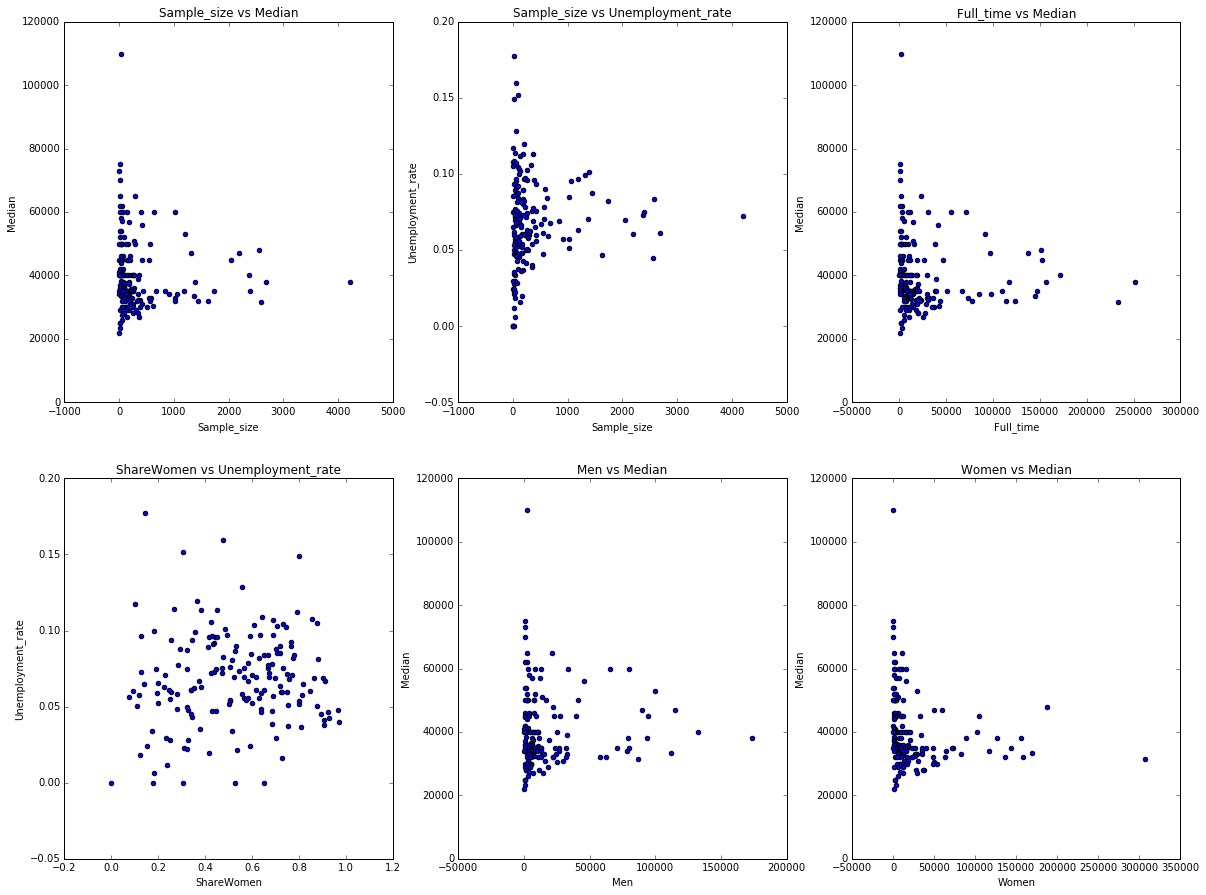

In [8]:
fig, axes = plt.subplots(nrows = 2,ncols = 3, figsize = (20,15))

ax1 = recent_grads.plot(ax = axes[0,0], x='Sample_size', y = 'Median', kind = 'scatter', 
                  title = 'Sample_size vs Median')
ax2 = recent_grads.plot(ax = axes[0,1], x='Sample_size', y = 'Unemployment_rate', kind = 'scatter', 
                  title = 'Sample_size vs Unemployment_rate')
ax3 = recent_grads.plot(ax = axes[0,2], x='Full_time', y = 'Median', kind = 'scatter', 
                  title = 'Full_time vs Median')
ax4 = recent_grads.plot(ax = axes[1,0], x='ShareWomen', y = 'Unemployment_rate', kind = 'scatter', 
                  title = 'ShareWomen vs Unemployment_rate')
ax5 = recent_grads.plot(ax = axes[1,1], x='Men', y = 'Median', kind = 'scatter', 
                  title = 'Men vs Median')
ax6 = recent_grads.plot(ax = axes[1,2], x='Women', y = 'Median', kind = 'scatter', 
                  title = 'Women vs Median')
plt.show()

From the scatter plots it can be concluded, that ShareWomen,(women as share of total) and the Unemployment are uncorrelated and that the Median and Sample_size display a weak positive correlation.

To answer the questions:

- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

We'll generate the necessary scatter plots and make observations


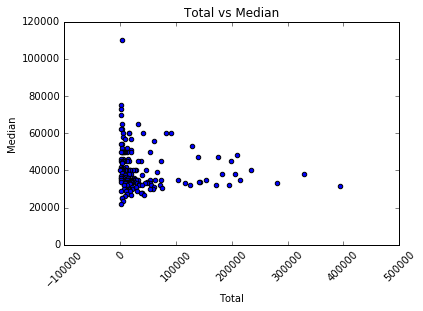

In [9]:
#scatter plot of total number of people with major vs median salary 
ax7 = recent_grads.plot(x='Total', y = 'Median', kind = 'scatter', 
                  title = 'Total vs Median')
plt.xticks(rotation = 45)
plt.show()

The plot does not indicate a clear correlation between total number of students with majors and the median salary.

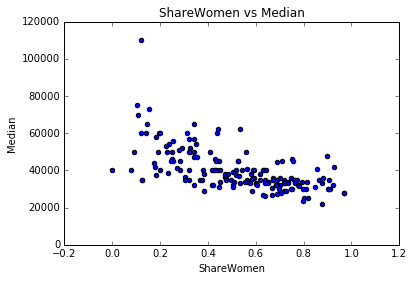

In [10]:
#scatter plot of share women vs median salary 
ax8 = recent_grads.plot(x='ShareWomen', y = 'Median', kind = 'scatter', 
                  title = 'ShareWomen vs Median')
plt.show()

The plot indicates that students that majored in subjects that were majority female make less money.

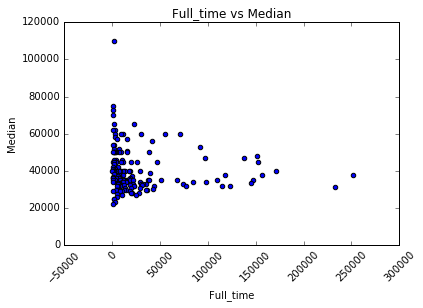

In [11]:
#scatter plot of number of full time employees vs median salary 
ax9 = recent_grads.plot(x='Full_time', y = 'Median', kind = 'scatter', 
                  title = 'Full_time vs Median')
plt.xticks(rotation = 45)
plt.show()

The plot does not indicate a clear correlation between number of full time employees and the median salary.

### Histograms

A **histogram** shows the underlying frequency distribution of a set of continuous data, thus displaying the distibution(eg, normal distribution) of the data. We'll generate various histograms to explore distributions of some of the columns.

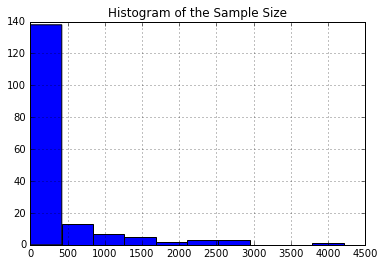

In [44]:
# histogram of sample size
hist1 = recent_grads['Sample_size'].hist()
hist1.set_title('Histogram of the Sample Size')
plt.show()

The values of the sample size column are skewed to the right.

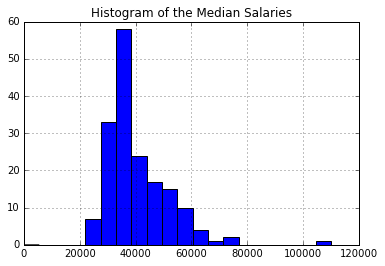

In [43]:
# histogram of median salaries
hist2 = recent_grads['Median'].hist(bins=20, range=(0,110000))
hist2.set_title('Histogram of the Median Salaries')
plt.show()

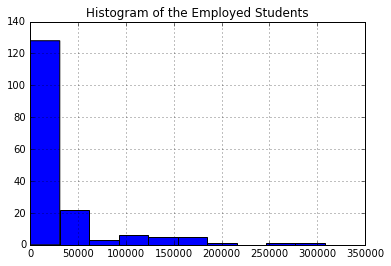

In [42]:
# histogram of employed students
hist3 = recent_grads['Employed'].hist()
hist3.set_title('Histogram of the Employed Students')
plt.show()

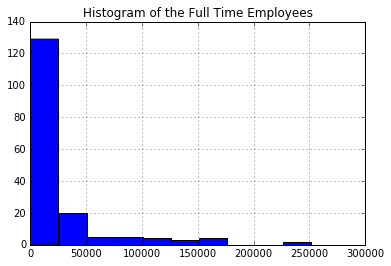

In [41]:
# histogram of full time employees
hist4 = recent_grads['Full_time'].hist()
hist4.set_title('Histogram of the Full Time Employees')
plt.show()

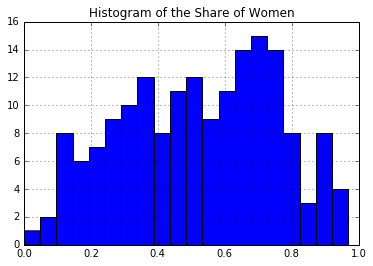

In [40]:
# histogram of share of women
hist5 = recent_grads['ShareWomen'].hist(bins=20)
hist5.set_title('Histogram of the Share of Women')
plt.show()

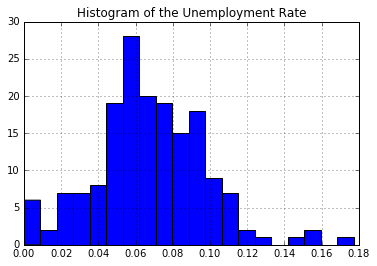

In [39]:
# histogram of unemployment rate
hist6 = recent_grads['Unemployment_rate'].hist(bins=20)
hist6.set_title('Histogram of the Unemployment Rate')
plt.show()

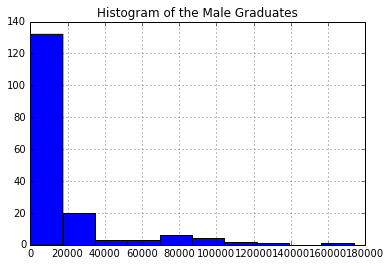

In [45]:
# histogram of male graduates
hist7 = recent_grads['Men'].hist()
hist7.set_title('Histogram of the Male Graduates')

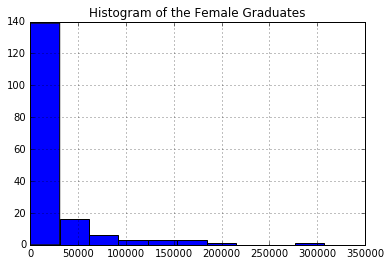

In [46]:
# histogram of male graduates
hist8 = recent_grads['Women'].hist()
hist8.set_title('Histogram of the Female Graduates')

#### Summary - Histograms

Most of the values of the columns are skewed to the right.
The unemployment rate seems to be normally distributed.

### Scatter Matrix Plots

A **scatter matrix plot** combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48341ca278>,
      dtype=object)

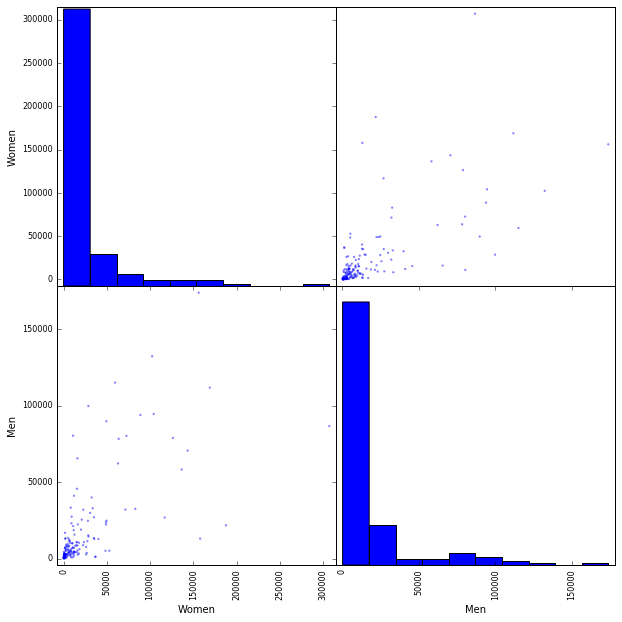

In [51]:
# importing the scatter_matrix() function, which is part of the pandas.plotting module
from pandas.plotting import scatter_matrix

# 2 x 2 scatter matrix plot
scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4835bcea20>,
      dtype=object)

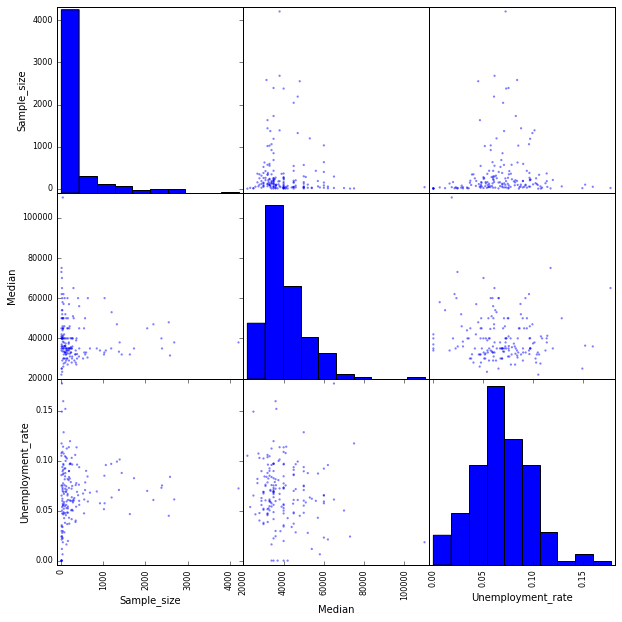

In [52]:
# 3 x 3 scatter matrix plot
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

### Bar Plots for further analysis

Bar plots to compare the percentages of women (ShareWomen) from the first ten rows and last ten rows of the recent_grads dataframe.

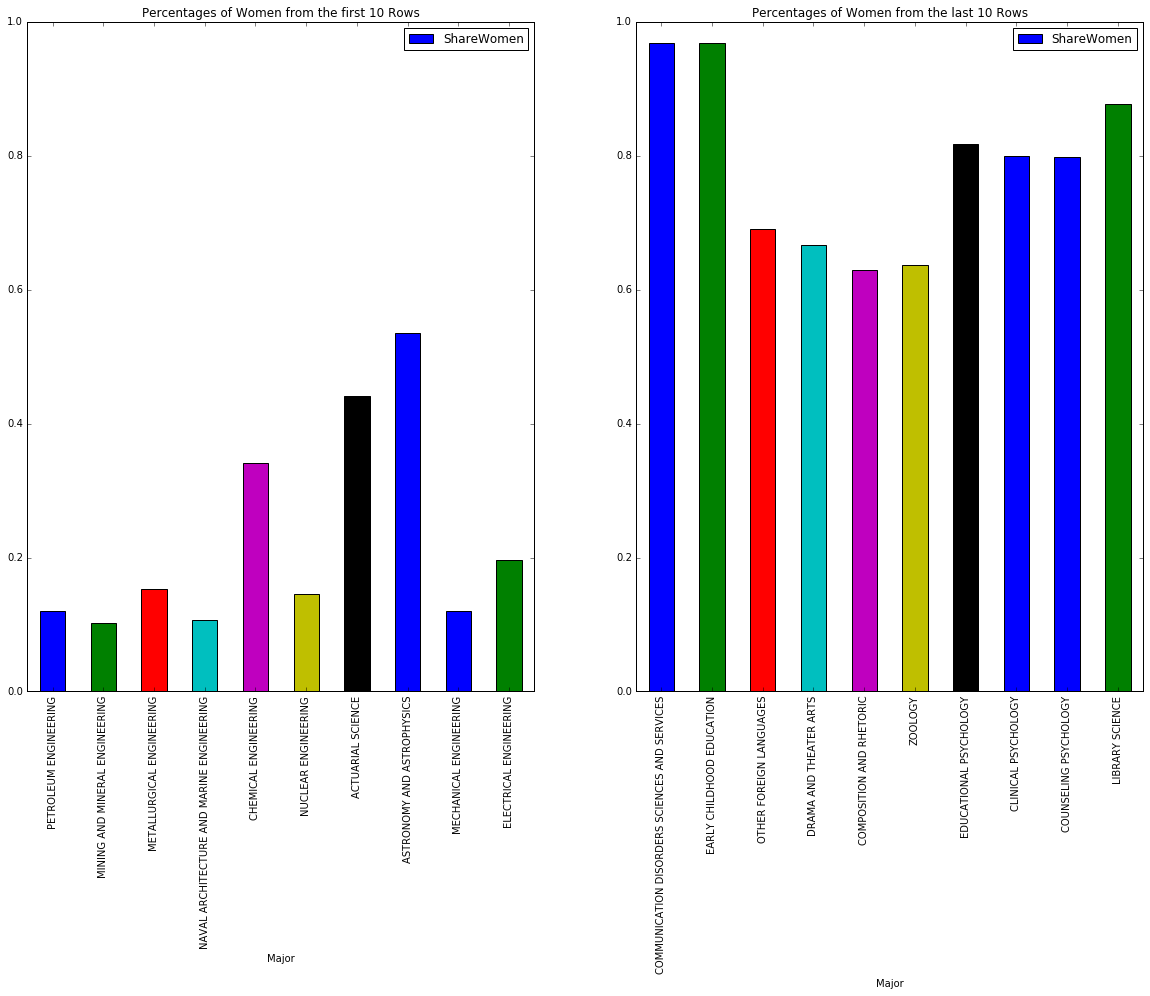

In [66]:
# percentages of women from the first ten rows vs. the last ten rows, sorted according to median earnings

fig = plt.figure(figsize = (20,12))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

recent_grads[:10].plot(x='Major', y='ShareWomen' , kind='bar', ax=ax1, title='Percentages of Women from the first 10 Rows', ylim=(0,1))
recent_grads[-10:].plot(x='Major', y='ShareWomen' , kind='bar', ax=ax2, title='Percentages of Women from the last 10 Rows', ylim=(0,1))

#### Observations

- From the first 10 records, majors such as Chemical Engineering, Actuarial Science, and Astronomy and Astrophysics have a higher percentage of women compared to the other majors listed in the first 10. However, only the Astronomy and Astrophysics major has a percentage of women > 50%.

- From the last 10 records, the percentages of women in all the majors are relatively high, i.e. > 60%.

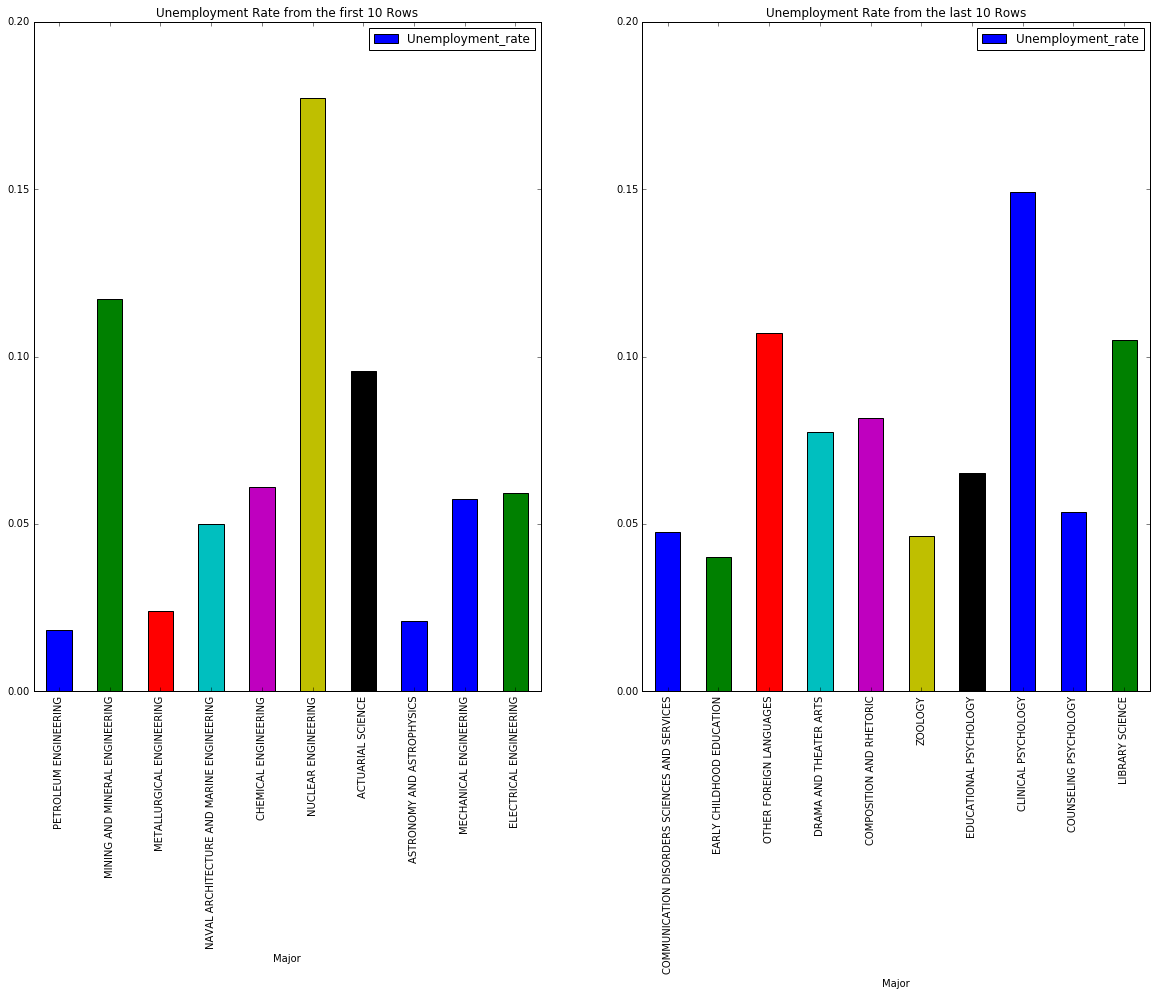

In [67]:
# unemployment rate from the first ten rows vs. the last ten rows, sorted according to median earnings

fig = plt.figure(figsize = (20,12))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

recent_grads[:10].plot(x='Major', y='Unemployment_rate' , kind='bar', ax=ax1, title='Unemployment Rate from the first 10 Rows', ylim=(0,0.2))
recent_grads[-10:].plot(x='Major', y='Unemployment_rate' , kind='bar', ax=ax2, title='Unemployment Rate from the last 10 Rows', ylim=(0,0.2))

#### Observations

- When comparing the first and the last 10 records, no clear trend towards higher unemployment rates can be observed.

- However, majors such as Nuclear Engineering, Mining and Mineral Engineering as well as Other Foreign Languages, Clinical Psychology, and Library Science have a relatively high unemployment rate, i.e. > 10%.


### Grouped Bar Plots

Finally, a grouped bar plot shall help to compare the number of men with the number of women in each category of majors.

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



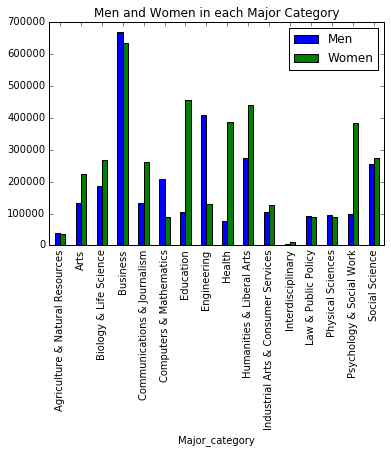

In [70]:
recent_grads.groupby('Major_category').sum().plot.bar(
    y=['Men','Women'], title="Men and Women in each Major Category")

### Observations

- The number of men and women with business majors are relatively the same and absolutely the highest for all major-category.

- The major-categories engineering as well as computers and mathematics have a much higher number of men.

- The major-categories communications & journalism, education, and psychology & social work have a much higher number (roughly larger or equal to double the number) of women compared to men.